# Project 3 Booking reviews

# Введение

## Какой кейс решаем?
Представьте, что вы работаете дата-сайентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

## Описание полей
* hotel_address — адрес отеля;
* review_date — дата, когда рецензент разместил соответствующий отзыв;
* average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* hotel_name — название отеля;
* reviewer_nationality — страна рецензента;
* negative_review — отрицательный отзыв, который рецензент дал отелю;
* review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
* positive_review — положительный отзыв, который рецензент дал отелю;
* review_total_positive_word_counts — общее количество слов в положительном отзыве.
* reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
* total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
* total_number_of_reviews — общее количество действительных отзывов об отеле;
* tags — теги, которые рецензент дал отелю;
* days_since_review — количество дней между датой проверки и датой очистки;
* additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* lat — географическая широта отеля;
* lng — географическая долгота отеля.


### Файлы для соревнования

* hotels_train.csv - набор данных для обучения [источник данных](https://www.kaggle.com/competitions/sf-booking/data)
* hotels_test.csv - набор данных для оценки качества [источник данных](https://www.kaggle.com/competitions/sf-booking/data)
* submission.csv - файл сабмишна в нужном формате [источник данных](https://www.kaggle.com/competitions/sf-booking/data)

# Загрузка и анализ данных
## Импорт библиотек

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session# This Python 3 environment comes with many helpful analytics libraries installe

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [4]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Проведем проверку на дубликаты

In [6]:
dupl_columns = list(df_train.columns)
df_train = df_train.drop_duplicates(subset=dupl_columns)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386496 non-null  object 
 1   additional_number_of_scoring                386496 non-null  int64  
 2   review_date                                 386496 non-null  object 
 3   average_score                               386496 non-null  float64
 4   hotel_name                                  386496 non-null  object 
 5   reviewer_nationality                        386496 non-null  object 
 6   negative_review                             386496 non-null  object 
 7   review_total_negative_word_counts           386496 non-null  int64  
 8   total_number_of_reviews                     386496 non-null  int64  
 9   positive_review                             386496 non-null  object 
 10  r

In [7]:
df_train.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [9]:
df_test.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [11]:
sample_submission.head()

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596


Для обработки признаков объединим тренировочный и тестовый датасет в один. Для разделения добавим общий признак sample, который будет равен 1 для тренировочных данных и 0 для тестовых. Так же в тестовом датасете создадим целевой признак reviewer_score и заполним его нулями.

In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

#hotels_modify = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
hotels_modify = pd.concat([df_test, df_train],ignore_index = True) # объединяем

In [13]:
hotels_modify

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0.0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0,0.0
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520,0,0.0
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,45.479888,9.196298,0,0.0
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,52.370545,4.888644,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515426,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,10,10,"[' Leisure trip ', ' Group ', ' Club Double or...",106 day,51.494028,-0.191050,1,8.8
515427,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,93,1,"[' Leisure trip ', ' Couple ', ' Standard Doub...",171 day,48.192379,16.399451,1,9.2
515428,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,9,21,"[' Business trip ', ' Solo traveler ', ' Singl...",543 day,51.520795,-0.131084,1,8.3
515429,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,6,28,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",74 days,51.515125,-0.160066,1,9.2


Проведем проверку на дубликаты

In [14]:
hotels_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

In [15]:
hotels_modify.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1473
lng                                             1473
sample                                             2
reviewer_score                                    38
dtype: int64

## 2. Проектирование признаков

Выделим признаки с пропусками в данных

In [16]:
hotels_nulls = hotels_modify.isnull().sum()
display(hotels_nulls[hotels_nulls > 0])

lat    3268
lng    3268
dtype: int64

В признаках lat и lng есть пропуски в данных. Убеждаемся, что пропуски в 'lat идентичны пропускам в 'lng'. Далее, сначала заполним справочный датафрейм адресов с пустыми значениями широты и долготы, а затем апдейтим этими значениями основной датафрейм

In [17]:
df_lat_lng = hotels_modify[hotels_modify['lat'].isnull()].groupby('hotel_address').count()[['lat', 'lng']]
df_lat_lng

,lat,lng
hotel_address,,
20 Rue De La Ga t 14th arr 75014 Paris France,0,0
23 Rue Damr mont 18th arr 75018 Paris France,0,0
4 rue de la P pini re 8th arr 75008 Paris France,0,0
Bail n 4 6 Eixample 08010 Barcelona Spain,0,0
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria,0,0
Hasenauerstra e 12 19 D bling 1190 Vienna Austria,0,0
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria,0,0
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria,0,0
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria,0,0


In [18]:
# напишем список с координатами по каждому из отелей в порядке расположения отелей в справочном фрейме 
# (благо их всего 17 и можно не использовать доп.ресурсы) 

lst_geo = [[48.8399957, 2.3070823], 
           [48.8889127, 2.3309643], 
           [48.8753208, 2.3212033], 
           [41.391552, 2.1757053],
           [48.2208555, 16.3644228],
           [48.233592, 16.3434781],
           [48.2094054, 16.3512565],
           [48.2095525, 16.3492746],
           [48.1888183, 16.381591],
           [48.1868142, 16.418528],
           [41.3749946, 2.1102353],
           [48.219573, 16.2834034],
           [41.3832425, 2.1607609],
           [48.2458909, 16.3397395],
           [48.2135906, 16.3777195],
           [48.2168032, 16.357717],
           [48.220414, 16.3536299]]

In [19]:
# заполним справочный фрейм координатами
for i in range (17):
    df_lat_lng.iloc[i] = lst_geo[i]
df_lat_lng

/tmp/ipykernel_18/535031066.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '48.8399957' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_lat_lng.iloc[i] = lst_geo[i]
/tmp/ipykernel_18/535031066.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.3070823' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_lat_lng.iloc[i] = lst_geo[i]


,lat,lng
hotel_address,,
20 Rue De La Ga t 14th arr 75014 Paris France,48.839996,2.307082
23 Rue Damr mont 18th arr 75018 Paris France,48.888913,2.330964
4 rue de la P pini re 8th arr 75008 Paris France,48.875321,2.321203
Bail n 4 6 Eixample 08010 Barcelona Spain,41.391552,2.175705
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria,48.220855,16.364423
Hasenauerstra e 12 19 D bling 1190 Vienna Austria,48.233592,16.343478
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria,48.209405,16.351257
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria,48.209553,16.349275
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria,48.188818,16.381591


In [20]:
# теперь осталось дополнить координатами  из справочного фрейма наш основной датафрейм
hotels_modify = hotels_modify.set_index('hotel_address')
hotels_modify.update(df_lat_lng)
hotels_modify = hotels_modify.reset_index()

In [21]:
hotels_modify.info() # проверяем, что не осталось пустых значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

### 2.1 Название отеля

Найдем количество уникальных отелей по названиям.

In [22]:
hotels_modify['hotel_name'].nunique()

1492

Выделим отели под одинаковым названием, но с различным адресом и добавим, для уникальности, к названию часть адреса.

In [23]:
address_list = hotels_modify.pivot_table(
    values = 'hotel_address',
    index = 'hotel_name',
    aggfunc = 'nunique'
)
dupl_hotel = address_list[address_list['hotel_address'] > 1]
display(dupl_hotel)
mask_1 = dupl_hotel[dupl_hotel['hotel_address'] > 1].index.to_list() # через временную переменную быстрее обрабатывается
hotels_modify['hotel_name'] = hotels_modify.apply(lambda x: (x['hotel_name'] + ' in ' + x['hotel_address'].split()[-1])
    if (x['hotel_name'] in mask_1) else x['hotel_name'], axis=1)
display(hotels_modify['hotel_name'].nunique())

,hotel_address
hotel_name,
Hotel Regina,3


1494

Окончательно получили 1494 уникальных отеля.

### 2.2 Адрес отеля

Из признака hotel_address, извлечём: страну и город.

In [24]:
hotels_modify['hotel_address'].head(10)

0                   Via Senigallia 6 20161 Milan Italy
1    Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...
2          Mallorca 251 Eixample 08008 Barcelona Spain
3    Piazza Della Repubblica 17 Central Station 201...
4    Singel 303 309 Amsterdam City Center 1012 WJ A...
5    Coram Street Camden London WC1N 1HT United Kin...
6    Empire Way Wembley Brent London HA9 8DS United...
7    1 Shortlands Hammersmith and Fulham London W6 ...
8          35 Rue Caumartin 9th arr 75009 Paris France
9    49 Gloucester Place Marble Arch Westminster Bo...
Name: hotel_address, dtype: object

In [25]:
hotels_modify['hotel_country'] = hotels_modify['hotel_address'].apply(lambda x: x.split()[-1])
hotels_modify['hotel_country'] = hotels_modify['hotel_country'].apply(lambda x:'United Kingdom' if x == 'Kingdom' else x)
country_list = list(hotels_modify['hotel_country'].unique())
display(country_list)

['Italy', 'Netherlands', 'Spain', 'United Kingdom', 'France', 'Austria']

Выделено 6 уникальных стран

In [26]:
hotels_modify['hotel_city'] = hotels_modify['hotel_address'].apply(lambda x: x.split()[-2])
hotels_modify['hotel_city'] = hotels_modify['hotel_city'].apply(lambda x: 'London' if x == 'United' else x)
city_list = list(hotels_modify['hotel_city'].unique())
display(city_list)

['Milan', 'Amsterdam', 'Barcelona', 'London', 'Paris', 'Vienna']

Так же получено 6 уникальных городов.
В каждой стране представлен только один город, по этому кодировать признак города не имеет смысла, кодируем страну и создаем новый признак.

In [27]:
hotels_modify['hotel_country_code'] = hotels_modify['hotel_country'].astype('category').cat.codes
hotels_modify.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score,hotel_country,hotel_city,hotel_country_code
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0.0,Italy,Milan,2
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0,0.0,Netherlands,Amsterdam,3
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,...,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520,0,0.0,Spain,Barcelona,4


### 2.3 Географические координаты.

Несмотря на то, что данные представлены в числовом виде правильнее их рассматривать как категориальные. Можно постараться сделать расчеты до центра города, или до ближайших станций метро или же до каких то достопримечательностей, но по моему проще избавиться от этих признаков.

In [28]:
hotels_modify = hotels_modify.drop(['lat', 'lng'], axis=1)
hotels_modify.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,sample,reviewer_score,hotel_country,hotel_city,hotel_country_code
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,0,0.0,Italy,Milan,2
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,0,0.0,Netherlands,Amsterdam,3
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,0,0.0,Spain,Barcelona,4
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,0,0.0,Italy,Milan,2
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,0,0.0,Netherlands,Amsterdam,3


### 2.4 Национальность рецензента.

Из признака 'reviewer_nationality'создаем новый признак 'Veight_reviewer_nationality', в котором вместо названия страны поставил число, соответствующее частоте встречающегося данного значения в выборке.

In [29]:
hotels_modify['reviewer_nationality'].unique() # Смотрим сколько уникальных значений у признака reviewer_nationality

array([' United Kingdom ', ' Belgium ', ' Sweden ',
       ' United States of America ', ' Ecuador ', ' Netherlands ',
       ' Ireland ', ' Canada ', ' Norway ', ' Bulgaria ', ' Italy ',
       ' Australia ', ' Seychelles ', ' Kuwait ', ' Saudi Arabia ',
       ' Czech Republic ', ' France ', ' Germany ', ' South Africa ',
       ' United Arab Emirates ', ' Greece ', ' Spain ', ' Switzerland ',
       ' Macedonia ', ' Poland ', ' Bahrain ', ' Qatar ', ' India ',
       ' Singapore ', ' Malaysia ', ' Thailand ', ' Brazil ', ' Crimea ',
       ' Turkey ', ' Israel ', ' ', ' Lebanon ', ' Romania ', ' Cyprus ',
       ' Portugal ', ' Slovakia ', ' Jersey ', ' Gibraltar ', ' Austria ',
       ' Kenya ', ' Isle of Man ', ' Costa Rica ', ' Oman ', ' Hungary ',
       ' Iceland ', ' Estonia ', ' Hong Kong ', ' China ', ' Malta ',
       ' Pakistan ', ' Montenegro ', ' Slovenia ', ' South Korea ',
       ' Ukraine ', ' Japan ', ' Azerbaijan ', ' Russia ', ' Brunei ',
       ' Cayman Islands ',

In [30]:
hotels_modify['reviewer_nationality'].describe()

count               515431
unique                 227
top        United Kingdom 
freq                245165
Name: reviewer_nationality, dtype: object

In [31]:
A = list(hotels_modify['reviewer_nationality'].unique()) # Создаем список уникальных значений признака reviewer_nationality
A

[' United Kingdom ',
 ' Belgium ',
 ' Sweden ',
 ' United States of America ',
 ' Ecuador ',
 ' Netherlands ',
 ' Ireland ',
 ' Canada ',
 ' Norway ',
 ' Bulgaria ',
 ' Italy ',
 ' Australia ',
 ' Seychelles ',
 ' Kuwait ',
 ' Saudi Arabia ',
 ' Czech Republic ',
 ' France ',
 ' Germany ',
 ' South Africa ',
 ' United Arab Emirates ',
 ' Greece ',
 ' Spain ',
 ' Switzerland ',
 ' Macedonia ',
 ' Poland ',
 ' Bahrain ',
 ' Qatar ',
 ' India ',
 ' Singapore ',
 ' Malaysia ',
 ' Thailand ',
 ' Brazil ',
 ' Crimea ',
 ' Turkey ',
 ' Israel ',
 ' ',
 ' Lebanon ',
 ' Romania ',
 ' Cyprus ',
 ' Portugal ',
 ' Slovakia ',
 ' Jersey ',
 ' Gibraltar ',
 ' Austria ',
 ' Kenya ',
 ' Isle of Man ',
 ' Costa Rica ',
 ' Oman ',
 ' Hungary ',
 ' Iceland ',
 ' Estonia ',
 ' Hong Kong ',
 ' China ',
 ' Malta ',
 ' Pakistan ',
 ' Montenegro ',
 ' Slovenia ',
 ' South Korea ',
 ' Ukraine ',
 ' Japan ',
 ' Azerbaijan ',
 ' Russia ',
 ' Brunei ',
 ' Cayman Islands ',
 ' Serbia ',
 ' Argentina ',
 ' Denmark 

In [32]:
# Создаем признак Veight_reviewer_nationality из признака reviewer_nationality по идее, описанной выше
Nacionality = {}
for State in range(0,len(A)):
    b = hotels_modify['reviewer_nationality'][hotels_modify['reviewer_nationality'] == A[State]]
    Nacionality[A[State]] = b.count()
    
hotels_modify['Veight_reviewer_nationality'] = hotels_modify['reviewer_nationality'].apply(lambda x:Nacionality[x])
hotels_modify['Veight_reviewer_nationality']

0         245165
1           6027
2           3366
3          35390
4         245165
           ...  
515426      7277
515427      5441
515428      8762
515429     10230
515430     21663
Name: Veight_reviewer_nationality, Length: 515431, dtype: int64

In [33]:
# Смотрим уникальные значения признака Veight_reviewer_nationality
hotels_modify['Veight_reviewer_nationality'].unique()

array([245165,   6027,   3366,  35390,     61,   8762,  14820,   7887,
         2382,   1313,   6113,  21663,     21,   4918,   8945,   2311,
         7277,   7936,   3820,  10230,   3401,   4735,   8672,    282,
         2889,   1591,   2754,   3434,   3089,   1881,   1880,   1865,
            6,   5441,   6604,    523,   2251,   4549,   1380,   1839,
          903,    862,    380,   2410,    269,    405,    119,   1334,
         2185,    933,    757,   3011,   3398,   1684,    916,    192,
          796,   1075,   1102,   1279,    277,   3898,    100,     42,
         1124,    516,   1721,   2383,   1828,    591,    923,    118,
         1072,   3235,   1359,    228,    719,    134,   1547,    215,
         1340,    289,     67,   1085,    151,     72,     76,    281,
          284,     24,    543,    246,    334,    756,    727,    154,
          286,     16,    187,    109,    153,    180,    977,    294,
           53,     33,     41,    250,     49,      8,     78,     58,
      

### 2.5 Тэги

In [34]:
# Попытаемся проанализировать признак tags - представляющий из себя список тегов
# Для того, чтобы не потерять записи текущего датафрейма - сделаем его копию hotels_modify_tags для дальнейшей обработки
hotels_modify_tags = hotels_modify.copy()

In [35]:
# Распакуем датафрейм по записям тегов - в каждой линии - будет только один тег из списка

def rev_func(num_tags):
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

hotels_modify_tags['tags_n'] = hotels_modify_tags['tags'].apply(rev_func)


hotels_modify_tags = hotels_modify_tags.explode('tags_n')
hotels_modify_tags

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,total_number_of_reviews_reviewer_has_given,tags,days_since_review,sample,reviewer_score,hotel_country,hotel_city,hotel_country_code,Veight_reviewer_nationality,tags_n
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,0,0.0,Italy,Milan,2,245165,Leisure trip
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,0,0.0,Italy,Milan,2,245165,Couple
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,0,0.0,Italy,Milan,2,245165,Double Room
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,0,0.0,Italy,Milan,2,245165,Stayed 2 nights
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,0,0.0,Netherlands,Amsterdam,3,6027,Leisure trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515429,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,28,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",74 days,1,9.2,United Kingdom,London,5,10230,Stayed 2 nights
515430,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,...,2,"[' Leisure trip ', ' Couple ', ' Bunk Bed Room...",363 day,1,8.8,United Kingdom,London,5,21663,Leisure trip
515430,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,...,2,"[' Leisure trip ', ' Couple ', ' Bunk Bed Room...",363 day,1,8.8,United Kingdom,London,5,21663,Couple
515430,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,...,2,"[' Leisure trip ', ' Couple ', ' Bunk Bed Room...",363 day,1,8.8,United Kingdom,London,5,21663,Bunk Bed Room


In [36]:
# Посмотрим уникальные значения тегов в датаФрейме
hotels_modify_tags['tags_n'].value_counts()

tags_n
Leisure trip                                417538
Submitted from a mobile device              307470
Couple                                      252128
Stayed 1 night                              193568
Stayed 2 nights                             133850
                                             ...  
Duplex King Suite 3 Adults                       1
Suite Free Executive Lounge Access               1
Suite with Executive Lounge Access               1
Family Room three bedrooms communicating         1
Quadruple Room 2 Adults 2 Children               1
Name: count, Length: 2428, dtype: int64

In [37]:
# Создадим признак nights - характернизующий число ночей, проведенных клиентом в отеле
def Stayed_search(Text):
    if "Stayed" in Text:
        a = Text.split(' ')
        return int(a[1])
    else:
        return None


hotels_modify_tags['nights'] = hotels_modify_tags['tags_n'].apply(Stayed_search)
hotels_modify_tags['nights']

0         NaN
0         NaN
0         NaN
0         2.0
1         NaN
         ... 
515429    2.0
515430    NaN
515430    NaN
515430    NaN
515430    4.0
Name: nights, Length: 2355206, dtype: float64

In [38]:
clean_nights = hotels_modify_tags['nights'].dropna()
clean_nights

0         2.0
1         1.0
2         1.0
3         1.0
4         2.0
         ... 
515426    2.0
515427    4.0
515428    1.0
515429    2.0
515430    4.0
Name: nights, Length: 515239, dtype: float64

In [39]:
hotels_modify['nights'] = clean_nights
hotels_modify

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,total_number_of_reviews_reviewer_has_given,tags,days_since_review,sample,reviewer_score,hotel_country,hotel_city,hotel_country_code,Veight_reviewer_nationality,nights
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,0,0.0,Italy,Milan,2,245165,2.0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,0,0.0,Netherlands,Amsterdam,3,6027,1.0
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,...,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,0,0.0,Spain,Barcelona,4,3366,1.0
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,...,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,0,0.0,Italy,Milan,2,35390,1.0
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,...,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,0,0.0,Netherlands,Amsterdam,3,245165,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515426,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,10,"[' Leisure trip ', ' Group ', ' Club Double or...",106 day,1,8.8,United Kingdom,London,5,7277,2.0
515427,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,1,"[' Leisure trip ', ' Couple ', ' Standard Doub...",171 day,1,9.2,Austria,Vienna,0,5441,4.0
515428,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,21,"[' Business trip ', ' Solo traveler ', ' Singl...",543 day,1,8.3,United Kingdom,London,5,8762,1.0
515429,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,28,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",74 days,1,9.2,United Kingdom,London,5,10230,2.0


In [40]:
# Создадим признак trip - вид пеутешествия постояльца отеля

def Trip_search(Text):
    if "trip" in Text:
        a = Text.split(' ')
        return a[1]
    else:
        return None
    
hotels_modify['trip'] = hotels_modify['tags'].apply(Trip_search)
hotels_modify

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,tags,days_since_review,sample,reviewer_score,hotel_country,hotel_city,hotel_country_code,Veight_reviewer_nationality,nights,trip
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,0,0.0,Italy,Milan,2,245165,2.0,Leisure
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,0,0.0,Netherlands,Amsterdam,3,6027,1.0,Leisure
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,...,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,0,0.0,Spain,Barcelona,4,3366,1.0,Business
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,...,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,0,0.0,Italy,Milan,2,35390,1.0,Leisure
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,...,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,0,0.0,Netherlands,Amsterdam,3,245165,2.0,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515426,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,"[' Leisure trip ', ' Group ', ' Club Double or...",106 day,1,8.8,United Kingdom,London,5,7277,2.0,Leisure
515427,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,"[' Leisure trip ', ' Couple ', ' Standard Doub...",171 day,1,9.2,Austria,Vienna,0,5441,4.0,Leisure
515428,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,"[' Business trip ', ' Solo traveler ', ' Singl...",543 day,1,8.3,United Kingdom,London,5,8762,1.0,Business
515429,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",74 days,1,9.2,United Kingdom,London,5,10230,2.0,Leisure


In [41]:
# Создадим признак Traveler_type - характеризующий каким образом путешествует постоялец, остановившийся в отеле - пара, один, семья с детьми, группа, с друзьями


Type_of_traveler = [' Couple ', ' Solo traveler ', ' Family with young children ', ' Group ', ' Travelers with friends ']

def Type_of_trav(* List):
    for i in List:
        for j in Type_of_traveler:
            if j in i: return j
    return None
        


hotels_modify['Traveler_type'] = hotels_modify['tags'].apply(Type_of_trav)

hotels_modify['Traveler_type']

0                 Couple 
1                  Group 
2          Solo traveler 
3                 Couple 
4          Solo traveler 
               ...       
515426             Group 
515427            Couple 
515428     Solo traveler 
515429     Solo traveler 
515430            Couple 
Name: Traveler_type, Length: 515431, dtype: object

In [42]:
Trav = {}
for T in range(0,len(Type_of_traveler)):
    b = hotels_modify['Traveler_type'][hotels_modify['Traveler_type'] == Type_of_traveler[T]]
    Trav[Type_of_traveler[T]] = b.count()
Trav[None] = hotels_modify['Traveler_type'][hotels_modify['Traveler_type'] == None].count()
    
Trav

{' Couple ': 252128,
 ' Solo traveler ': 108476,
 ' Family with young children ': 60989,
 ' Group ': 65361,
 ' Travelers with friends ': 2143,
 None: 0}

In [43]:
# Закодируем признак Traveler_type в числовую форму Type_of_traveler, "приемом" уже примененным при создании признака Veight_reviewer_nationality 

hotels_modify['Type_of_traveler'] = hotels_modify['Traveler_type'].apply(lambda x:Trav[x])
hotels_modify = hotels_modify.drop(['Traveler_type'], axis=1)
hotels_modify

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,days_since_review,sample,reviewer_score,hotel_country,hotel_city,hotel_country_code,Veight_reviewer_nationality,nights,trip,Type_of_traveler
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,13 days,0,0.0,Italy,Milan,2,245165,2.0,Leisure,252128
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,234 day,0,0.0,Netherlands,Amsterdam,3,6027,1.0,Leisure,65361
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,...,616 day,0,0.0,Spain,Barcelona,4,3366,1.0,Business,108476
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,...,656 day,0,0.0,Italy,Milan,2,35390,1.0,Leisure,252128
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,...,444 day,0,0.0,Netherlands,Amsterdam,3,245165,2.0,Business,108476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515426,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,106 day,1,8.8,United Kingdom,London,5,7277,2.0,Leisure,65361
515427,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,171 day,1,9.2,Austria,Vienna,0,5441,4.0,Leisure,252128
515428,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,543 day,1,8.3,United Kingdom,London,5,8762,1.0,Business,108476
515429,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,74 days,1,9.2,United Kingdom,London,5,10230,2.0,Leisure,108476


In [44]:
# Закодируем признак trip в числовую форму Trip, "приемом" уже примененным при создании признака Veight_reviewer_nationality

A = list(hotels_modify['trip'].unique())
Trip = {}
for T in range(0,len(A)):
    b = hotels_modify['trip'][hotels_modify['trip'] == A[T]]
    Trip[A[T]] = b.count()
    
hotels_modify['Trip'] = hotels_modify['trip'].apply(lambda x:Trip[x])
hotels_modify = hotels_modify.drop(['trip'], axis=1)
hotels_modify

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,days_since_review,sample,reviewer_score,hotel_country,hotel_city,hotel_country_code,Veight_reviewer_nationality,nights,Type_of_traveler,Trip
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,13 days,0,0.0,Italy,Milan,2,245165,2.0,252128,416432
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,234 day,0,0.0,Netherlands,Amsterdam,3,6027,1.0,65361,416432
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,...,616 day,0,0.0,Spain,Barcelona,4,3366,1.0,108476,82693
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,...,656 day,0,0.0,Italy,Milan,2,35390,1.0,252128,416432
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,...,444 day,0,0.0,Netherlands,Amsterdam,3,245165,2.0,108476,82693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515426,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,106 day,1,8.8,United Kingdom,London,5,7277,2.0,65361,416432
515427,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,171 day,1,9.2,Austria,Vienna,0,5441,4.0,252128,416432
515428,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,543 day,1,8.3,United Kingdom,London,5,8762,1.0,108476,82693
515429,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,74 days,1,9.2,United Kingdom,London,5,10230,2.0,108476,416432


### 2.6 Дата отзыва

In [45]:
# Создадим признак Number_days_since_review, выбрав цифру из записи в признаке days_since_review

hotels_modify['days_since_review'].unique()

array(['13 days', '234 day', '616 day', '656 day', '444 day', '721 day',
       '350 day', '723 day', '404 day', '673 day', '559 day', '152 day',
       '45 days', '99 days', '297 day', '315 day', '560 day', '177 day',
       '241 day', '321 day', '309 day', '118 day', '311 day', '239 day',
       '715 day', '323 day', '322 day', '39 days', '205 day', '238 day',
       '688 day', '465 day', '63 days', '214 day', '529 day', '294 day',
       '710 day', '579 day', '23 days', '337 day', '678 day', '317 day',
       '655 day', '702 day', '676 day', '374 day', '718 day', '534 day',
       '452 day', '282 day', '168 day', '296 day', '100 day', '480 day',
       '197 day', '204 day', '664 day', '629 day', '532 day', '66 days',
       '313 day', '189 day', '442 day', '220 day', '505 day', '87 days',
       '632 day', '72 days', '470 day', '327 day', '274 day', '244 day',
       '719 day', '433 day', '64 days', '604 day', '601 day', '685 day',
       '730 day', '366 day', '499 day', '281 day', 

In [46]:
def Days_search(Text):
    a = Text.split(' ')
    return int(a[0])


hotels_modify['Number_days_since_review'] = hotels_modify['days_since_review'].apply(Days_search)
hotels_modify

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,sample,reviewer_score,hotel_country,hotel_city,hotel_country_code,Veight_reviewer_nationality,nights,Type_of_traveler,Trip,Number_days_since_review
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,0,0.0,Italy,Milan,2,245165,2.0,252128,416432,13
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,0,0.0,Netherlands,Amsterdam,3,6027,1.0,65361,416432,234
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,...,0,0.0,Spain,Barcelona,4,3366,1.0,108476,82693,616
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,...,0,0.0,Italy,Milan,2,35390,1.0,252128,416432,656
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,...,0,0.0,Netherlands,Amsterdam,3,245165,2.0,108476,82693,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515426,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,1,8.8,United Kingdom,London,5,7277,2.0,65361,416432,106
515427,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,1,9.2,Austria,Vienna,0,5441,4.0,252128,416432,171
515428,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,1,8.3,United Kingdom,London,5,8762,1.0,108476,82693,543
515429,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,1,9.2,United Kingdom,London,5,10230,2.0,108476,416432,74


### 2.7 Отзывы

Отзывы и их структура поможет разобраться в поставленной задаче лучше всего. Для этого надо изучить отзывы, выделить эмоциональную окраску: негативная, нейтральная, позитивная.

Применяем библиотеку VADER, класс SentimentIntensityAnalyzer.

In [47]:
hotels_modify['negative_review'].unique()

array([' Would have appreciated a shop in the hotel that sold drinking water etc but not necessity Would recommend if like us you arrive late at night to bring drinks from plane airport as there s no shop nearby There is a minibar though if you want to pay those prices ',
       ' No tissue paper box was present at the room', ' Pillows ', ...,
       ' Our room was really cold and we had problem with the heater They had to bring a portable heater to fix the issue ',
       ' room is really small but guess is normal in London ',
       ' Patio outside could have been cleaned of algae to give a more uplifting atmosphere to a downstairs room '],
      dtype=object)

In [48]:
len(hotels_modify['negative_review'].unique())

330011

In [49]:
#pip install nltk

In [50]:
# Используем для анализа признаков negative_review и positive_review используем библиотеку nltk путем создания из каждого признака - 4х цифровых признаков

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

sent_analyzer = SentimentIntensityAnalyzer()

A = hotels_modify['negative_review'].apply(sent_analyzer.polarity_scores)

hotels_modify['negative_review_neg'] = A.apply(lambda x: x['neg'])
hotels_modify['negative_review_neu'] = A.apply(lambda x: x['neu'])
hotels_modify['negative_review_pos'] = A.apply(lambda x: x['pos'])
hotels_modify['negative_review_compound'] = A.apply(lambda x: x['compound'])

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
hotels_modify[['negative_review_neg','negative_review_neu','negative_review_pos','negative_review_compound']]

,negative_review_neg,negative_review_neu,negative_review_pos,negative_review_compound
0,0.129,0.747,0.125,-0.0554
1,0.216,0.784,0.000,-0.2960
2,0.000,1.000,0.000,0.0000
3,1.000,0.000,0.000,-0.7096
4,1.000,0.000,0.000,-0.7096
...,...,...,...,...
515426,1.000,0.000,0.000,-0.7096
515427,1.000,0.000,0.000,-0.7096
515428,0.000,1.000,0.000,0.0000
515429,1.000,0.000,0.000,-0.7096


In [52]:
B = hotels_modify['positive_review'].apply(sent_analyzer.polarity_scores)

hotels_modify['positive_review_neg'] = B.apply(lambda x: x['neg'])
hotels_modify['positive_review_neu'] = B.apply(lambda x: x['neu'])
hotels_modify['positive_review_pos'] = B.apply(lambda x: x['pos'])
hotels_modify['positive_review_compound'] = B.apply(lambda x: x['compound'])

In [53]:
hotels_modify[['positive_review_neg','positive_review_neu','positive_review_pos','positive_review_compound']]

,positive_review_neg,positive_review_neu,positive_review_pos,positive_review_compound
0,0.000,0.671,0.329,0.9615
1,0.379,0.000,0.621,0.3400
2,0.000,0.260,0.740,0.6908
3,0.000,0.621,0.379,0.9153
4,0.000,0.230,0.770,0.7717
...,...,...,...,...
515426,0.000,1.000,0.000,0.0000
515427,0.045,0.857,0.098,0.7264
515428,0.000,0.465,0.535,0.7845
515429,0.000,1.000,0.000,0.0000


### 2.7 Отели

In [54]:
# Проанализируем признаки hotel_address и hotel_name с целью их дальнейшей цифровизации

hotels_modify['hotel_address'].unique()

array(['Via Senigallia 6 20161 Milan Italy',
       'Arlandaweg 10 Westpoort 1043 EW Amsterdam Netherlands',
       'Mallorca 251 Eixample 08008 Barcelona Spain', ...,
       '22 avenue de Villiers 17th arr 75017 Paris France',
       '17 rue de Richelieu 1st arr 75001 Paris France',
       '64 Rue Crozatier 12th arr 75012 Paris France'], dtype=object)

In [55]:
hotels_modify['hotel_address'].describe()

count                                                515431
unique                                                 1493
top       163 Marsh Wall Docklands Tower Hamlets London ...
freq                                                   4789
Name: hotel_address, dtype: object

In [56]:
hotels_modify['hotel_name'].unique()

array(['Hotel Da Vinci', 'Urban Lodge Hotel',
       'Alexandra Barcelona A DoubleTree by Hilton', ...,
       'L Edmond H tel', 'Drawing Hotel',
       'Mercure Paris Bastille Saint Antoine'], dtype=object)

In [57]:
hotels_modify['hotel_name'].describe()

count                                         515431
unique                                          1494
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: hotel_name, dtype: object

In [58]:
A1 = list(hotels_modify['hotel_name'].unique())
Hotel = {}
for H in range(0,len(A1)):
    b = hotels_modify['hotel_name'][hotels_modify['hotel_name'] == A1[H]]
    #print('{} - {}'.format(A[State],b.count()))
    Hotel[A1[H]] = b.count()
    
hotels_modify['Veight_hotel'] = hotels_modify['hotel_name'].apply(lambda x:Hotel[x])
hotels_modify['Veight_hotel']

0         1876
1         1071
2           77
3          280
4         1837
          ... 
515426     285
515427     419
515428    1273
515429     561
515430     491
Name: Veight_hotel, Length: 515431, dtype: int64

## 3. Отбор призаков

### 3.1 Очистка дата-сета от ненужных вспомогательных признаков

In [59]:
hotels_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

In [60]:
hotels_copy = hotels_modify.copy()

Удаляем колонки с типом object

In [61]:
object_columns = [s for s in hotels_copy.columns if hotels_copy[s].dtypes == 'object']
hotels_copy.drop(object_columns, axis = 1, inplace=True)

In [62]:
hotels_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515431 non-null  int64  
 1   average_score                               515431 non-null  float64
 2   review_total_negative_word_counts           515431 non-null  int64  
 3   total_number_of_reviews                     515431 non-null  int64  
 4   review_total_positive_word_counts           515431 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515431 non-null  int64  
 6   sample                                      515431 non-null  int64  
 7   reviewer_score                              515431 non-null  float64
 8   hotel_country_code                          515431 non-null  int8   
 9   Veight_reviewer_nationality                 515431 non-null  int64  
 

### 3.2 Анализ мультиколлинеарности

In [63]:
cols_num = [
    'review_total_negative_word_counts',
    'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given',
    'nights',
    'Number_days_since_review',
    'negative_review_neg',
    'negative_review_neu',
    'negative_review_pos',
    'negative_review_compound',
    'positive_review_neg',
    'positive_review_neu',
    'positive_review_pos',
    'positive_review_compound',
]

cols_cat = [
    'additional_number_of_scoring',
    'average_score',
    'total_number_of_reviews',
    'hotel_country_code',
    'reviewer_score',
    'Veight_reviewer_nationality',
    'Type_of_traveler',
    'Trip',
    'Veight_hotel'    
]

print(len(cols_num))
print(len(cols_cat))

13
9


In [64]:
def show_corr_heatmap(columns_list, title, method):
    fig_, ax_ = plt.subplots(figsize=(15, 12))
    corr = hotels_copy[columns_list].corr(method=method)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr,
                annot=True,
                linewidths=0.1,
                ax=ax_,
                mask=mask,
                cmap='viridis',
                fmt='.1g')
    ax_.set_title(title, fontsize=18)
    plt.show()

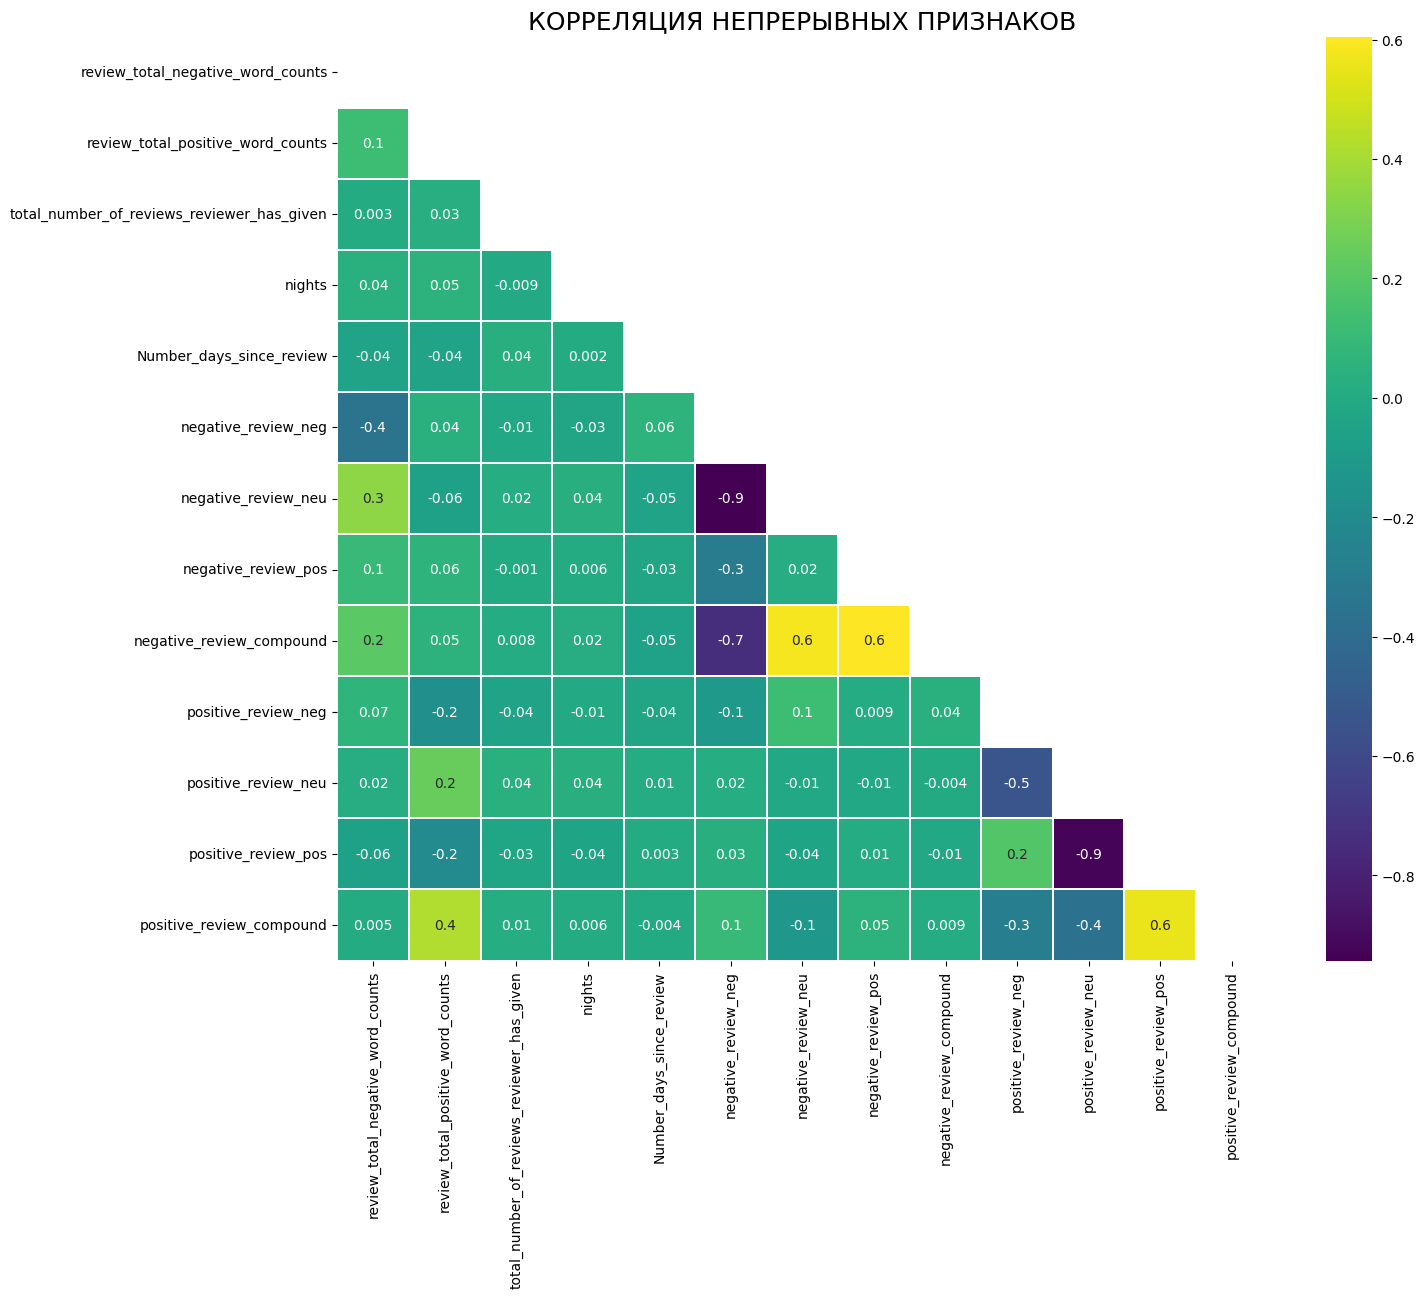

In [65]:
show_corr_heatmap(cols_num, 'КОРРЕЛЯЦИЯ НЕПРЕРЫВНЫХ ПРИЗНАКОВ', method='pearson')

In [66]:
#drop_columns = ['neg_review_sentiments_pos']

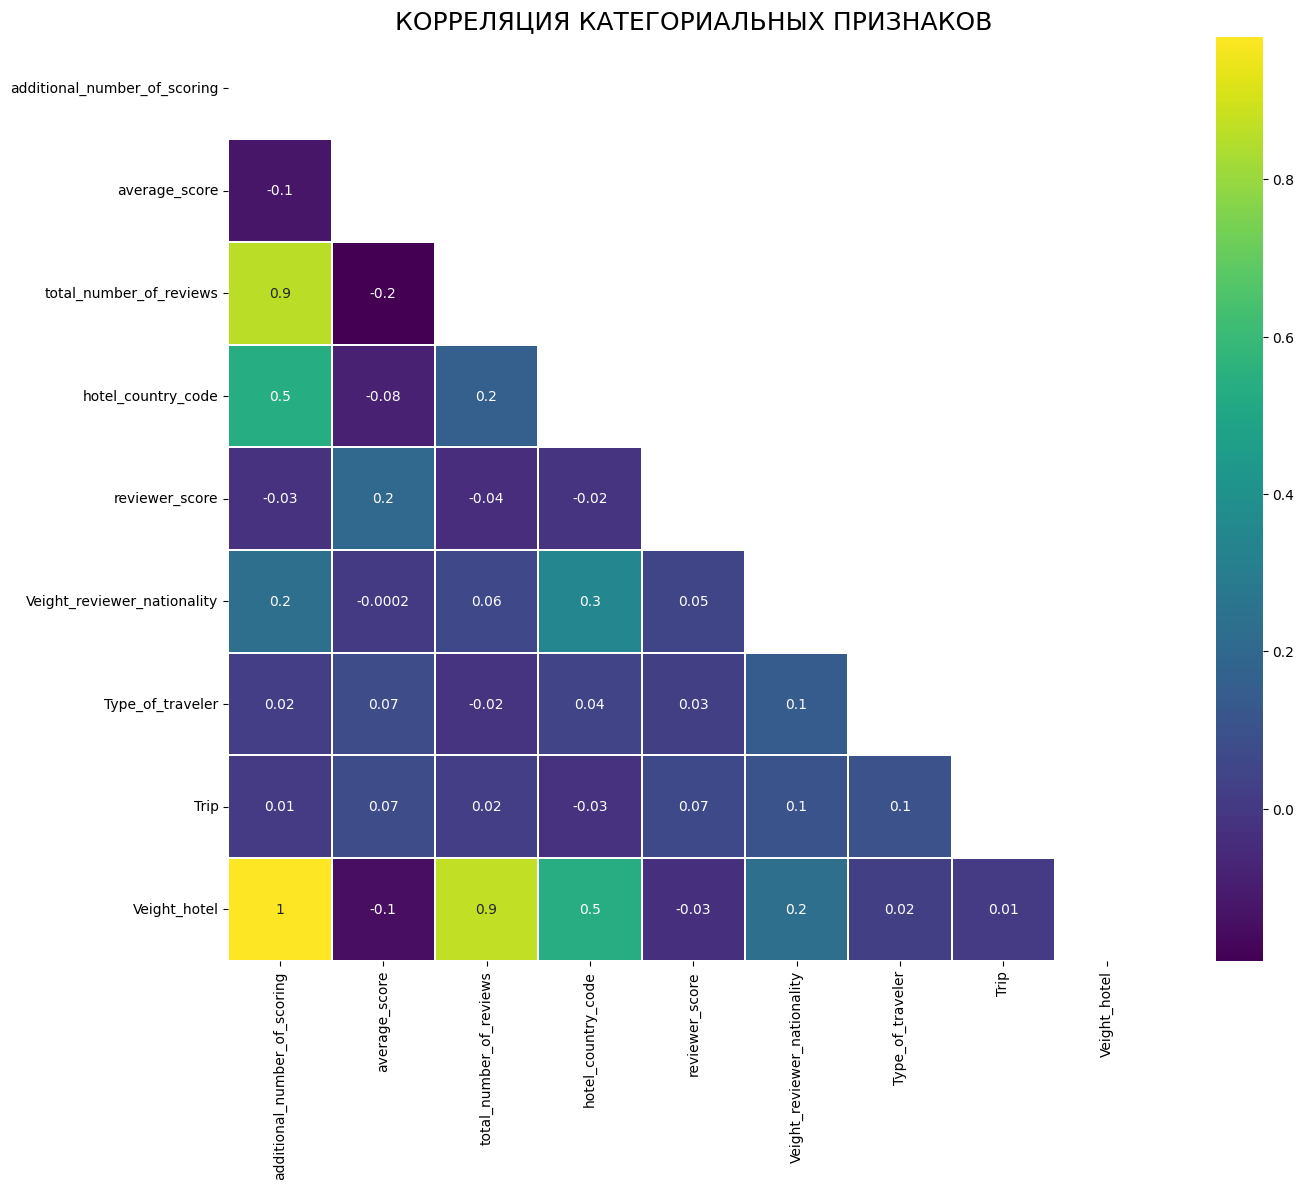

In [67]:
show_corr_heatmap(cols_cat, 'КОРРЕЛЯЦИЯ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ', method='spearman');

### 3.3 Оценка значимости признаков

In [68]:
# заполним пропущенные значения каким-то одним значением и заполним средним арифметическим для всего столбца

#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'additional_number_of_scoring': hotels_copy['additional_number_of_scoring'].median(),
    'average_score': hotels_copy['average_score'].median(),
    'review_total_negative_word_counts': hotels_copy['review_total_negative_word_counts'].median(),
    'total_number_of_reviews': hotels_copy['total_number_of_reviews'].median(),
    'review_total_positive_word_counts': hotels_copy['review_total_positive_word_counts'].median(),
    'total_number_of_reviews_reviewer_has_given': hotels_copy['total_number_of_reviews_reviewer_has_given'].median(),
    'reviewer_score': hotels_copy['reviewer_score'].median(),
    'Veight_reviewer_nationality': hotels_copy['Veight_reviewer_nationality'].mode(),
    'Number_days_since_review': hotels_copy['Number_days_since_review'].mode(),
    'Veight_hotel': hotels_copy['Veight_hotel'].mode(),
    'nights': 1,
    'Trip': hotels_copy['Trip'].mode(),
    'Type_of_traveler': hotels_copy['Type_of_traveler'].mode()  
    }

#заполняем пропуски в соответствии с заявленным словарем
hotels_copy = hotels_copy.fillna(values)

<Axes: >

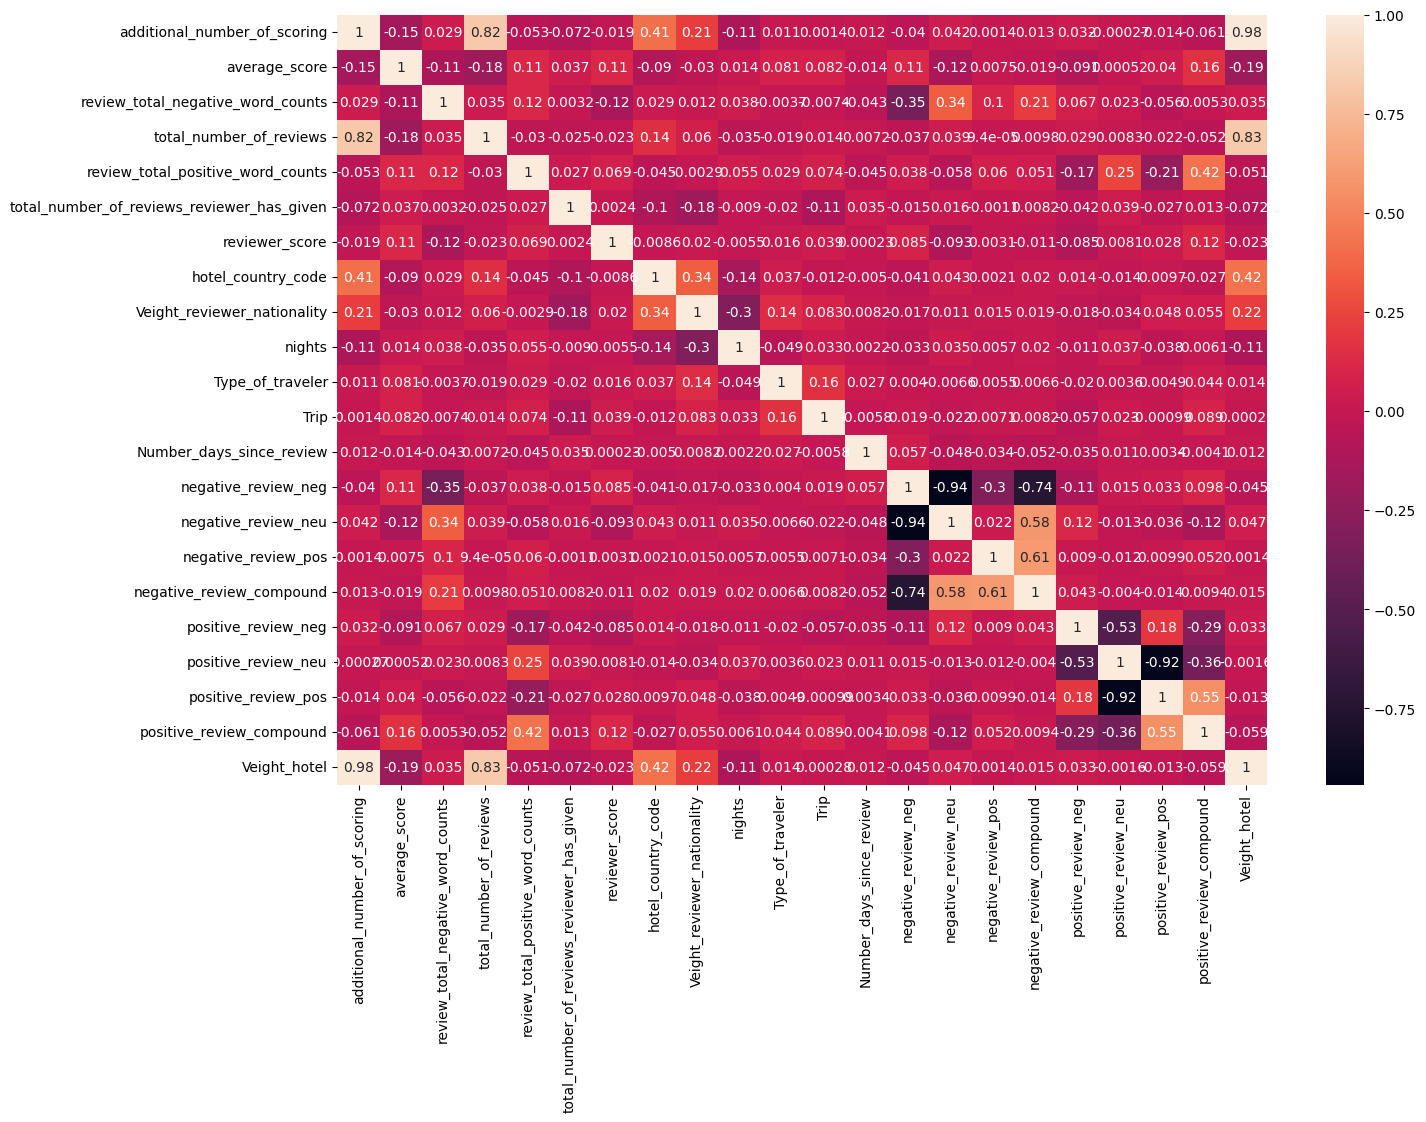

In [69]:
# Строим граффик корреляции признаков

plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(hotels_copy.drop(['sample'], axis=1).corr(), annot=True)

In [70]:
# Список пар для проверки на корреляцию
cor_list = [
    'additional_number_of_scoring',
    'average_score',
    'review_total_negative_word_counts',
    'total_number_of_reviews',
    'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given',
    'hotel_country_code',
    'Veight_reviewer_nationality',
    'negative_review_neg',
    'negative_review_neu',
    'negative_review_pos',
    'negative_review_compound',
    'positive_review_neg',
    'positive_review_neu',
    'positive_review_pos',
    'positive_review_compound',  
    'Number_days_since_review',
    'Veight_hotel',
    'nights',
    'Trip',
    'Type_of_traveler'
]
    

cor_list_end = []

for elem in cor_list:
    cor_list_end.append(
        (elem, round(hotels_copy.corr()[elem]['reviewer_score'], 2)) # numeric_only=True
    )
cor_list_end_filtr = [i for i in filter(lambda x: ((abs(x[1]) < 0.01)), cor_list_end)]

cor_list_end_filtr

[('total_number_of_reviews_reviewer_has_given', 0.0),
 ('negative_review_pos', 0.0),
 ('Number_days_since_review', 0.0)]

In [71]:
cor_list_end

[('additional_number_of_scoring', -0.02),
 ('average_score', 0.11),
 ('review_total_negative_word_counts', -0.12),
 ('total_number_of_reviews', -0.02),
 ('review_total_positive_word_counts', 0.07),
 ('total_number_of_reviews_reviewer_has_given', 0.0),
 ('hotel_country_code', -0.01),
 ('Veight_reviewer_nationality', 0.02),
 ('negative_review_neg', 0.09),
 ('negative_review_neu', -0.09),
 ('negative_review_pos', 0.0),
 ('negative_review_compound', -0.01),
 ('positive_review_neg', -0.09),
 ('positive_review_neu', 0.01),
 ('positive_review_pos', 0.03),
 ('positive_review_compound', 0.12),
 ('Number_days_since_review', 0.0),
 ('Veight_hotel', -0.02),
 ('nights', -0.01),
 ('Trip', 0.04),
 ('Type_of_traveler', 0.02)]

Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

<Axes: >

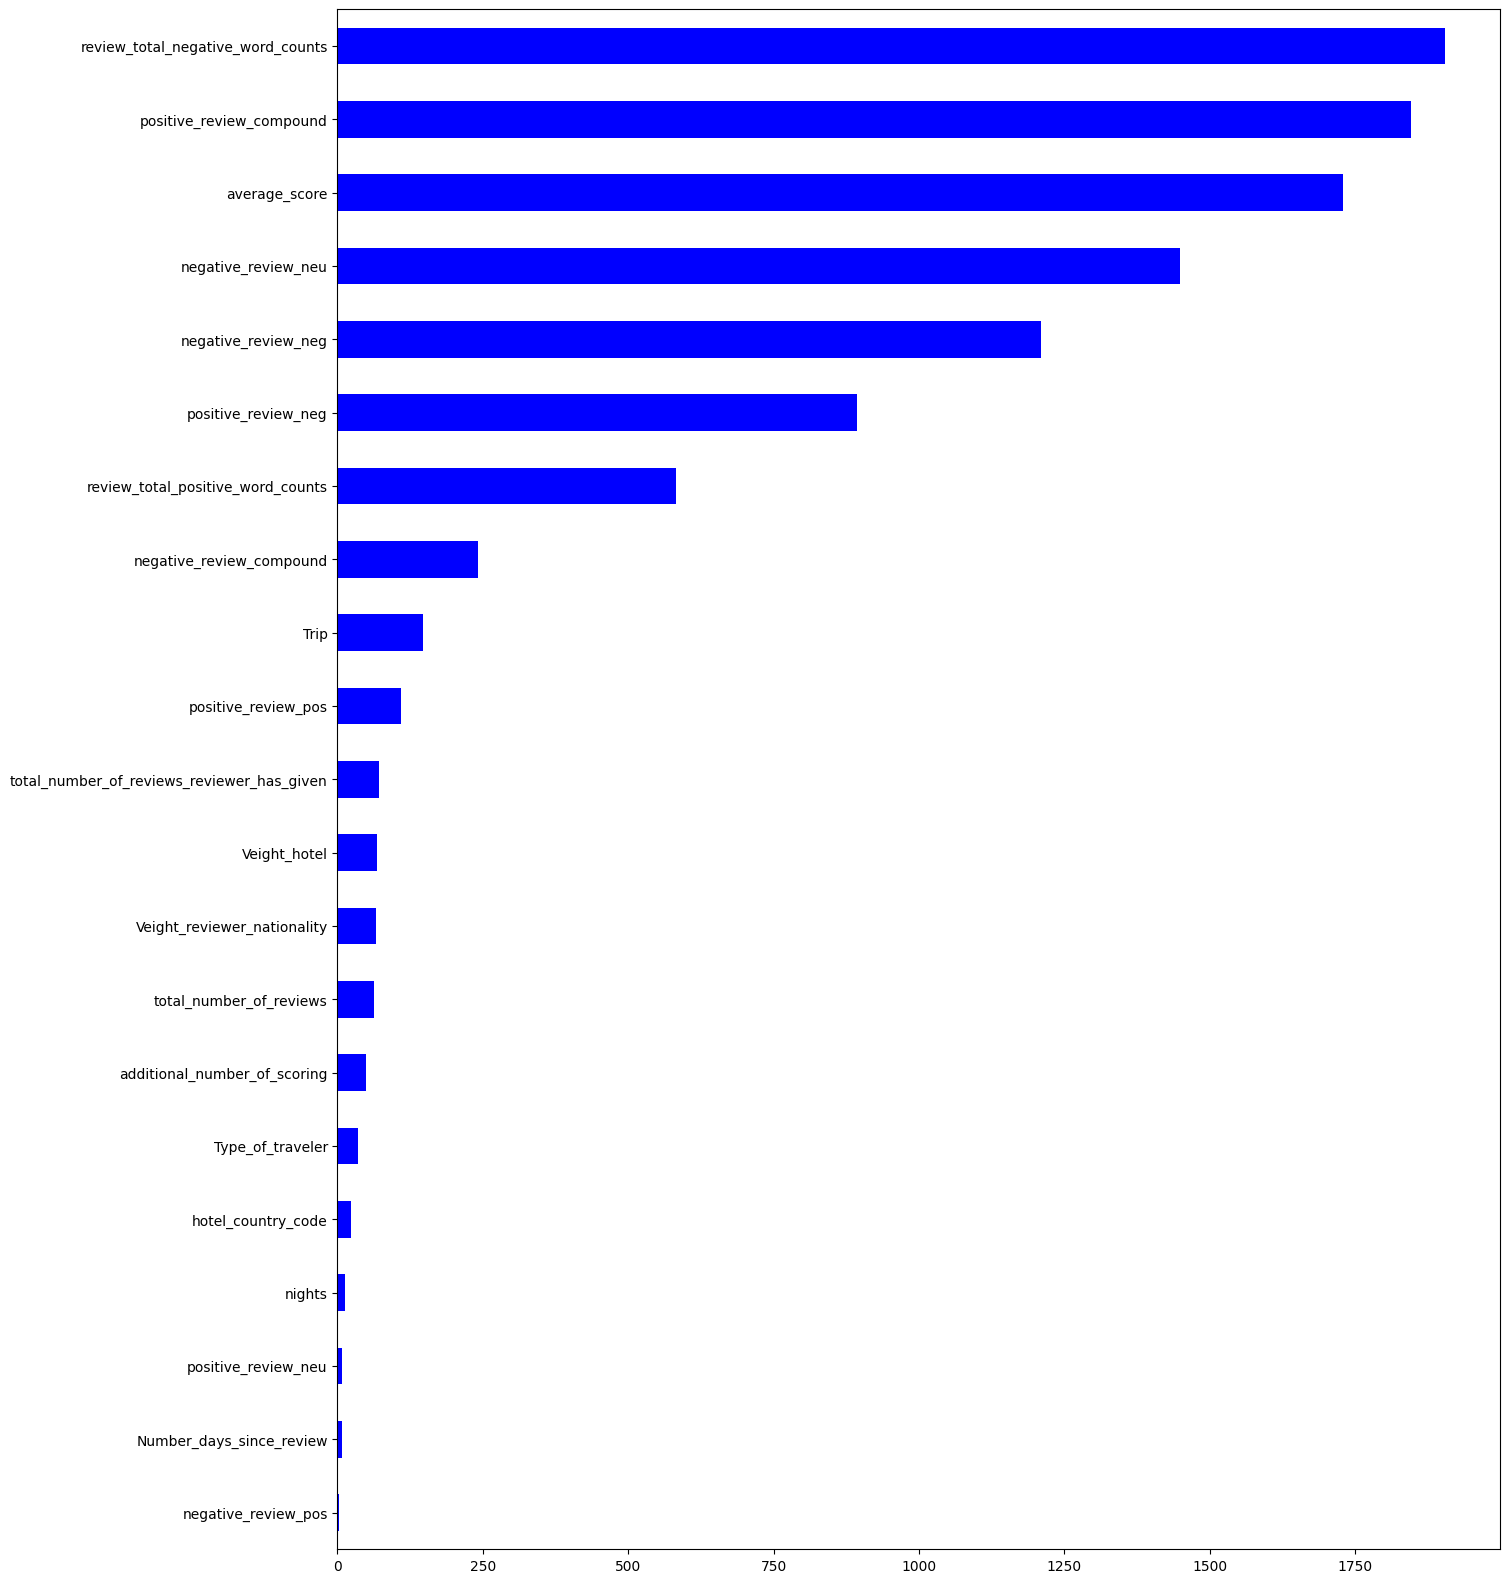

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestRegressor

y = hotels_copy.query('sample == 1').drop(['sample'], axis=1)['reviewer_score'].values
X = hotels_copy.query('sample == 1').drop(['sample', 'reviewer_score'], axis=1)

# визуализируем результат анализа значимости:
imp_num = pd.Series(f_classif(X[X.columns], y)[0], index = X.columns)
imp_num.sort_values(inplace = True)

fig5, ax5 = plt.subplots(figsize=(15, 20))
imp_num.plot(kind = 'barh', color='blue')

In [73]:
imp_num

negative_review_pos                              2.594766
Number_days_since_review                         7.372380
positive_review_neu                              8.099878
nights                                          12.933715
hotel_country_code                              23.687425
Type_of_traveler                                35.091111
additional_number_of_scoring                    49.876258
total_number_of_reviews                         63.454704
Veight_reviewer_nationality                     66.252146
Veight_hotel                                    68.391694
total_number_of_reviews_reviewer_has_given      71.470907
positive_review_pos                            109.099459
Trip                                           147.119635
negative_review_compound                       241.453657
review_total_positive_word_counts              581.651117
positive_review_neg                            893.777861
negative_review_neg                           1210.676828
negative_revie

In [74]:
drop_columns = imp_num[imp_num < 15].index.tolist()
drop_columns

['negative_review_pos',
 'Number_days_since_review',
 'positive_review_neu',
 'nights']

In [75]:
hotels_copy.drop(drop_columns, axis = 1, inplace=True)
hotels_copy

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,sample,reviewer_score,hotel_country_code,Veight_reviewer_nationality,Type_of_traveler,Trip,negative_review_neg,negative_review_neu,negative_review_compound,positive_review_neg,positive_review_pos,positive_review_compound,Veight_hotel
0,904,8.1,52,16670,62,1,0,0.0,2,245165,252128,416432,0.129,0.747,-0.0554,0.000,0.329,0.9615,1876
1,612,8.6,10,5018,0,7,0,0.0,3,6027,65361,416432,0.216,0.784,-0.2960,0.379,0.621,0.3400,1071
2,46,8.3,3,351,5,15,0,0.0,4,3366,108476,82693,0.000,1.000,0.0000,0.000,0.740,0.6908,77
3,241,9.1,0,1543,27,9,0,0.0,2,35390,252128,416432,1.000,0.000,-0.7096,0.000,0.379,0.9153,280
4,834,9.1,0,4687,7,2,0,0.0,3,245165,108476,82693,1.000,0.000,-0.7096,0.000,0.770,0.7717,1837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515426,107,9.0,0,617,10,10,1,8.8,5,7277,65361,416432,1.000,0.000,-0.7096,0.000,0.000,0.0000,285
515427,272,8.4,0,3224,93,1,1,9.2,0,5441,252128,416432,1.000,0.000,-0.7096,0.045,0.098,0.7264,419
515428,457,6.8,12,2751,9,21,1,8.3,5,8762,108476,82693,0.000,1.000,0.0000,0.000,0.535,0.7845,1273
515429,365,8.1,0,1567,6,28,1,9.2,5,10230,108476,416432,1.000,0.000,-0.7096,0.000,0.000,0.0000,561


In [76]:
hotels_model = hotels_copy.copy()

In [77]:
import category_encoders as ce # импорт для работы с кодировщиком

bin_encoder = ce.BinaryEncoder(cols=['Veight_reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels_model['Veight_reviewer_nationality'])
hotels_model = pd.concat([hotels_model, type_bin], axis=1)

bin_encoder = ce.BinaryEncoder(cols=['Veight_hotel']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels_model['Veight_hotel'])
hotels_model = pd.concat([hotels_model, type_bin], axis=1)

hotels_model

/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,sample,reviewer_score,hotel_country_code,Veight_reviewer_nationality,...,Veight_hotel_0,Veight_hotel_1,Veight_hotel_2,Veight_hotel_3,Veight_hotel_4,Veight_hotel_5,Veight_hotel_6,Veight_hotel_7,Veight_hotel_8,Veight_hotel_9
0,904,8.1,52,16670,62,1,0,0.0,2,245165,...,0,0,0,0,0,0,0,0,0,1
1,612,8.6,10,5018,0,7,0,0.0,3,6027,...,0,0,0,0,0,0,0,0,1,0
2,46,8.3,3,351,5,15,0,0.0,4,3366,...,0,0,0,0,0,0,0,0,1,1
3,241,9.1,0,1543,27,9,0,0.0,2,35390,...,0,0,0,0,0,0,0,1,0,0
4,834,9.1,0,4687,7,2,0,0.0,3,245165,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515426,107,9.0,0,617,10,10,1,8.8,5,7277,...,0,0,1,0,0,1,1,1,1,0
515427,272,8.4,0,3224,93,1,1,9.2,0,5441,...,0,1,1,0,0,0,1,0,0,0
515428,457,6.8,12,2751,9,21,1,8.3,5,8762,...,0,0,1,1,1,1,0,0,1,1
515429,365,8.1,0,1567,6,28,1,9.2,5,10230,...,0,0,0,1,0,0,0,1,1,1


## 4. Обучение модели и получение предсказания

Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [78]:
# Теперь выделим тестовую часть
train_data = hotels_model.query('sample == 1').drop(['sample'], axis=1)
test_data = hotels_model.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [79]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [80]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

In [81]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 36), (386496, 36), (386496, 35), (289872, 35), (96624, 35))

In [82]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [83]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [84]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.6s finished


In [85]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
#print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

In [86]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12559702680435764


<Axes: >

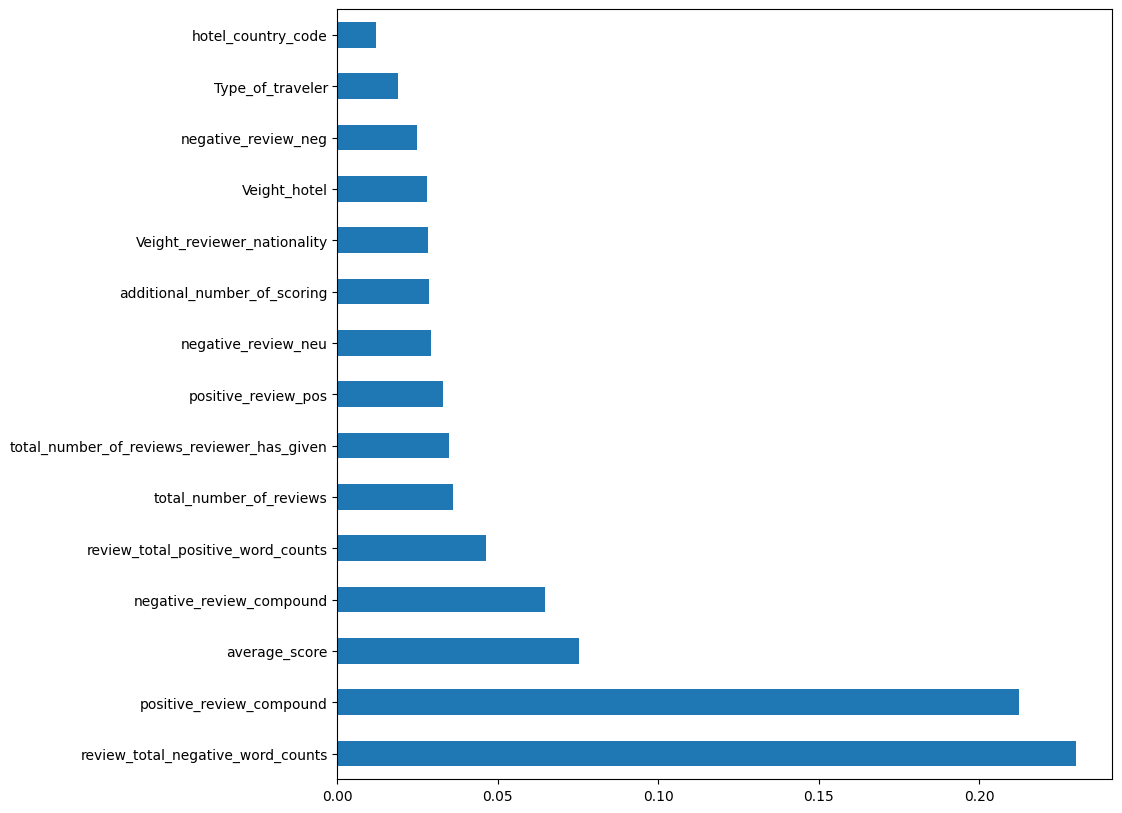

In [87]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [88]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [89]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.7s finished


In [90]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.713,488440
1,7.638,274649
2,8.748,374688
3,9.779,404352
4,9.285,451596
5,8.663,302161
6,7.771,317079
7,7.728,13963
8,8.572,159785
9,7.396,195089
